# Environment initialization

In [1]:
import scipy.io

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import savemat

import matplotlib as mpl
import matplotlib.colors as colors

In [2]:
# Tune figure size
mpl.rcParams.update({'font.size': 15})
mpl.rcParams.update({'figure.dpi': 200})
mpl.rcParams.update({'figure.figsize': (6,4.5)})

In [3]:
# Allow permission from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Names of the data folders
FolderNameRoot = 'drive/My Drive/Colab Notebooks/PredictingUnsolved_CleanCode/'
FolderName_Data = FolderNameRoot + 'DataFiles/'
FolderName_Fig = FolderNameRoot + 'Figures/'
print(FolderName_Data)
print(FolderName_Fig)

drive/My Drive/Colab Notebooks/PredictingUnsolved_CleanCode/DataFiles/
drive/My Drive/Colab Notebooks/PredictingUnsolved_CleanCode/Figures/


# Plot histograms of $P_{bias}$ v.s. $V_{bias}$ & time

In [5]:
FileName1_Pb = 'DataPb_N1_R100000_k0_1_4k0_0_eta5_kT0.0001_v0_0.01_dt0.001.mat'
FileName1_Lang = 'DataLang_N1_R100000_k0_1_4k0_0_eta5_kT0.0001_v0_0.01_dt0.001.mat'

FileName2_Pb = 'DataPb_N1_R100000_k0.5_1_4k0_0_eta5_kT0.0001_v0.01_0.01_dt0.001.mat'
FileName2_Lang = 'DataLang_N1_R100000_k0.5_1_4k0_0_eta5_kT0.0001_v0.01_0.01_dt0.001.mat'

In [6]:
# Load data
data1_Lang = scipy.io.loadmat(FolderName_Data + FileName1_Lang)
data1_Pb = scipy.io.loadmat(FolderName_Data + FileName1_Pb)

data2_Lang = scipy.io.loadmat(FolderName_Data + FileName2_Lang)
data2_Pb = scipy.io.loadmat(FolderName_Data + FileName2_Pb)

In [7]:
# Convert data
data1_r_1 = data1_Lang['r_1']
data1_r_2 = data1_Lang['r_2']
data1_r_bias = data1_Lang['r_bias']
data1_k2_1 = data1_Lang['k2_1'][0,0]
data1_k2_2 = data1_Lang['k2_2'][0,0]
data1_time = data1_Lang['time'][0]

data2_r_1 = data2_Lang['r_1']
data2_r_2 = data2_Lang['r_2']
data2_r_bias = data2_Lang['r_bias']
data2_k2_1 = data2_Lang['k2_1'][0,0]
data2_k2_2 = data2_Lang['k2_2'][0,0]
data2_time = data2_Lang['time'][0]


print(data1_r_1.shape)
print(data1_r_2.shape)
print(data1_r_bias.shape)
print(data1_time.shape)
print(data1_k2_1)
print(data1_k2_2)

print(data2_r_1.shape)
print(data2_r_2.shape)
print(data2_r_bias.shape)
print(data2_time.shape)
print(data2_k2_1)
print(data2_k2_2)

(1, 10000)
(1, 10000)
(1, 10000)
(10000,)
0
1
(1, 10000)
(1, 10000)
(1, 10000)
(10000,)
0.5
1


In [12]:
data1_Pbias = data1_Pb['Pfactor_out']
data1_time_Pb = data1_Pb['time_Pb'][0]
print(data1_Pbias.shape)
print(data1_time_Pb.shape)

data2_Pbias = data2_Pb['Pfactor_out']
data2_time_Pb = data2_Pb['time_Pb'][0]
print(data2_Pbias.shape)
print(data2_time_Pb.shape)

(100000, 500)
(500,)
(100000, 500)
(500,)


In [9]:
# quadratic potential
def V_quadr(u, k2):
  return 1.0/2.0 * k2 * u**2

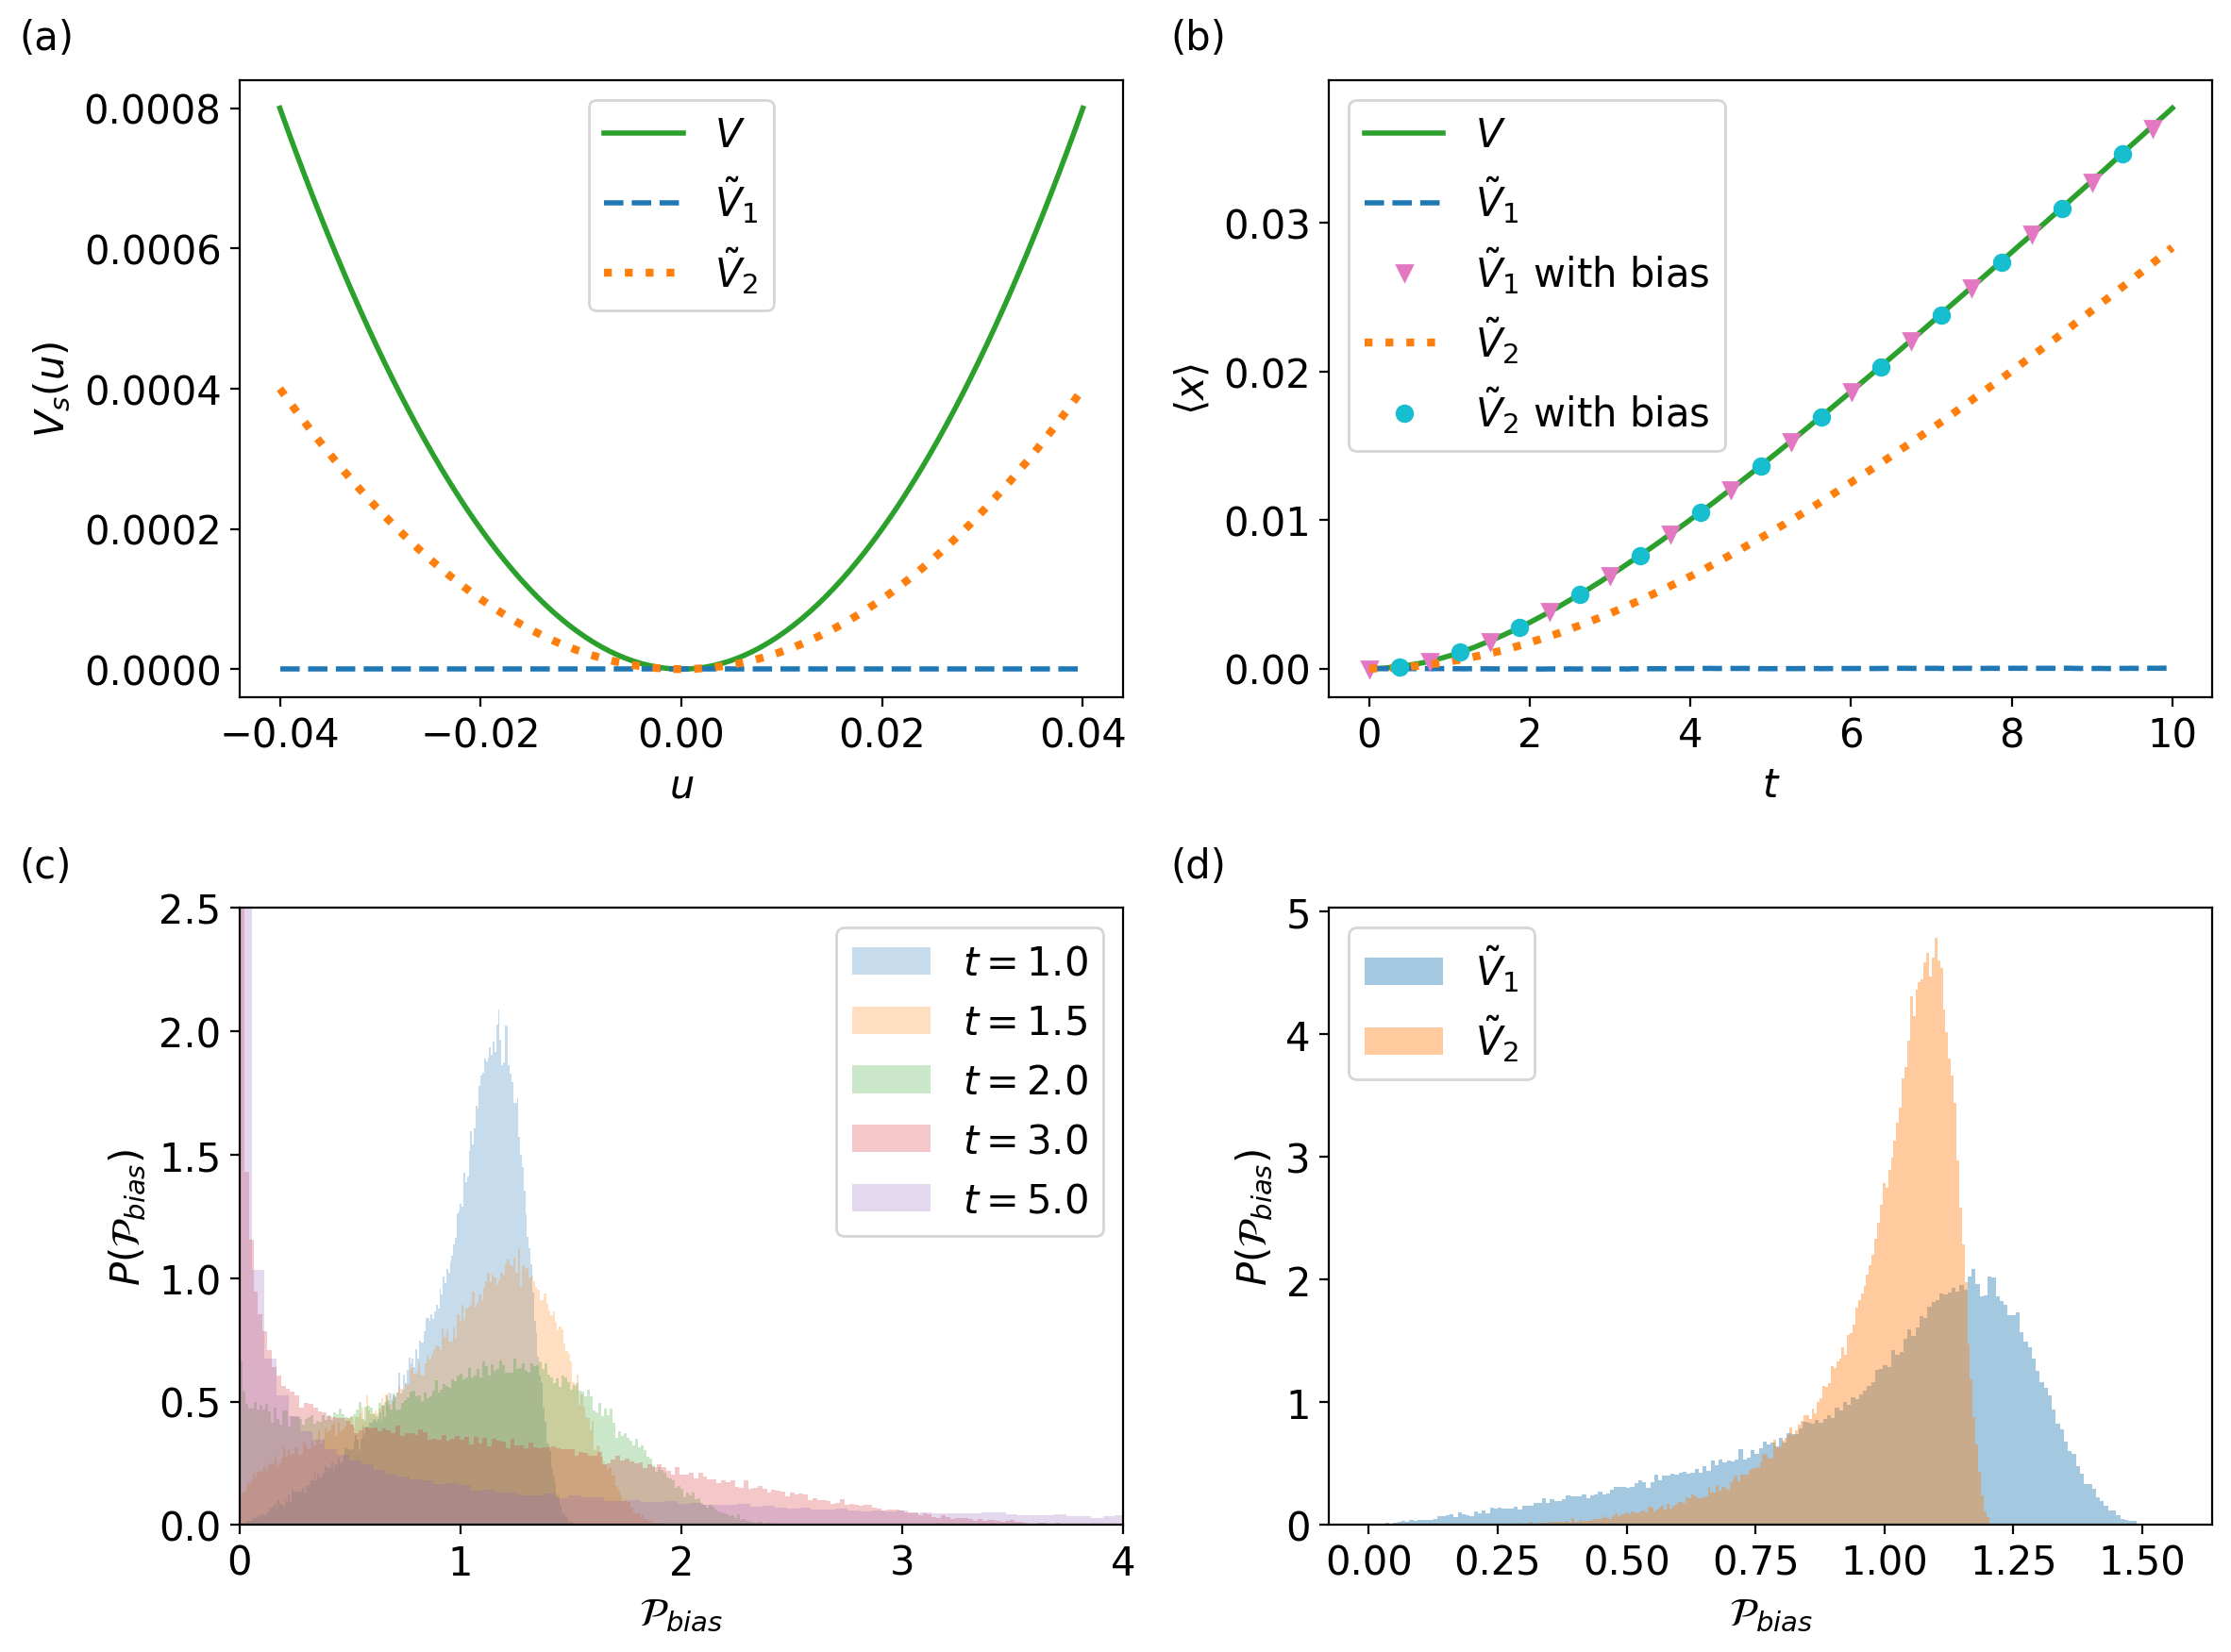

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12,9), tight_layout=1.1)
# fig, axs = plt.subplots(2, 2, figsize=(16,8), tight_layout=False)

ax=axs[0,0]
plt.sca(ax)
u_plot = np.linspace(-0.04, 0.04, 101)
V1_1 = V_quadr(u_plot, data1_k2_1)
V2_1 = V_quadr(u_plot, data2_k2_1)
V1_2 = V_quadr(u_plot, data1_k2_2)
V2_2 = V_quadr(u_plot, data2_k2_2)

plt.plot(u_plot, V1_2, 'C2', linewidth=2.0, label = '$V$')
plt.plot(u_plot, V1_1, 'C0--', linewidth=2.0, label = '$\~V_1$')
plt.plot(u_plot, V2_1, 'C1:', linewidth=3, label = '$\~V_2$')
# plt.plot(u_plot, V2_2, label = '$\~{V}_2$')
plt.xlabel('$u$')
plt.ylabel('$V_s(u)$')
ax.text(-0.25,1.05,'(a)',transform=ax.transAxes)
plt.legend()


ax=axs[0,1]
plt.sca(ax)

N_dis = 750
index_1 = range(0,len(data1_time),N_dis)
index_2 = range(int(N_dis/2),len(data1_time),N_dis)

plt.plot(data1_time, data1_r_2[0], 'C2', linewidth=2.0, label = '$V$')
plt.plot(data1_time, data1_r_1[0], 'C0--', linewidth=2.0, label = '$\~{V}_1$')
plt.plot(data1_time[index_1], data1_r_bias[0,index_1], 'C6v', markersize=6, label = '$\~V_1$ with bias')
plt.plot(data1_time, data2_r_1[0], 'C1:', linewidth=3, label = '$\~{V}_2$')
plt.plot(data1_time[index_2], data2_r_bias[0,index_2], 'C9o', markersize=6, label = '$\~V_2$ with bias')
plt.xlabel('$t$')
plt.ylabel(r'$\langle x \rangle$')
ax.text(-0.18,1.05,'(b)',transform=ax.transAxes)
plt.legend()


ax=axs[1,0]
plt.sca(ax)

time_index = np.array([50, 75, 100, 150, 250])-1

for i in range(len(time_index)):
  plt.hist(data1_Pbias[:,time_index[i]], density=True, label='$t=%.1f$' % data1_time_Pb[time_index[i]],\
           bins=200, alpha=0.25)
plt.xlabel('$\mathcal{P}_{bias}$')
plt.ylabel('$P(\mathcal{P}_{bias})$')
plt.xlim([0,4])
plt.ylim([0,2.5])
ax.text(-0.25,1.05,'(c)',transform=ax.transAxes)
plt.legend()


ax=axs[1,1]
plt.sca(ax)

plt.hist(data1_Pbias[:,time_index[0]], density=True, label='$\~V_1$', bins=200, alpha=0.4)
plt.hist(data2_Pbias[:,time_index[0]], density=True, label='$\~V_2$', bins=200, alpha=0.4)
plt.xlabel('$\mathcal{P}_{bias}$')
plt.ylabel('$P(\mathcal{P}_{bias})$')
# plt.xlim([0,1.5])
# plt.ylim([0,4])
ax.text(-0.18,1.05,'(d)',transform=ax.transAxes)
plt.legend(loc='upper left')

plt.show()

fig.savefig(FolderName_Fig + 'Sampling_Pb.png', bbox_inches = "tight")


# Plot histograms of $P_{bias}$ v.s. particle number

In [15]:
FileName1_Pb = 'DataPb_N1_R100000_k0_1_4k0_0_eta5_kT0.0001_v0_0.01_dt0.001.mat'
FileName1_Lang = 'DataLang_N1_R100000_k0_1_4k0_0_eta5_kT0.0001_v0_0.01_dt0.001.mat'

FileName2_Pb = 'DataPb_N2_R100000_k0_1_4k0_0_eta5_kT0.0001_v0_0.015_dt0.001.mat'
FileName2_Lang = 'DataLang_N2_R100000_k0_1_4k0_0_eta5_kT0.0001_v0_0.015_dt0.001.mat'

FileName3_Pb = 'DataPb_N3_R100000_k0_1_4k0_0_eta5_kT0.0001_v0_0.02_dt0.001.mat'
FileName3_Lang = 'DataLang_N3_R100000_k0_1_4k0_0_eta5_kT0.0001_v0_0.02_dt0.001.mat'

In [16]:
# Load data
data1_Lang = scipy.io.loadmat(FolderName_Data + FileName1_Lang)
data1_Pb = scipy.io.loadmat(FolderName_Data + FileName1_Pb)

data2_Lang = scipy.io.loadmat(FolderName_Data + FileName2_Lang)
data2_Pb = scipy.io.loadmat(FolderName_Data + FileName2_Pb)

data3_Lang = scipy.io.loadmat(FolderName_Data + FileName3_Lang)
data3_Pb = scipy.io.loadmat(FolderName_Data + FileName3_Pb)

In [17]:
data1_time = data1_Lang['time'][0]
data1_N = data1_Lang['N'][0,0]
data1_Pbias = data1_Pb['Pfactor_out']
data1_time_Pb = data1_Pb['time_Pb'][0]

data2_time = data2_Lang['time'][0]
data2_N = data2_Lang['N'][0,0]
data2_Pbias = data2_Pb['Pfactor_out']
data2_time_Pb = data2_Pb['time_Pb'][0]

data3_time = data3_Lang['time'][0]
data3_N = data3_Lang['N'][0,0]
data3_Pbias = data3_Pb['Pfactor_out']
data3_time_Pb = data3_Pb['time_Pb'][0]


print(data1_time.shape)
print(data1_N)
print(data1_Pbias.shape)
print(data1_time_Pb.shape)

print(data2_time.shape)
print(data2_N)
print(data2_Pbias.shape)
print(data2_time_Pb.shape)

print(data3_time.shape)
print(data3_N)
print(data3_Pbias.shape)
print(data3_time_Pb.shape)


(10000,)
1
(100000, 500)
(500,)
(10000,)
2
(100000, 500)
(500,)
(10000,)
3
(100000, 500)
(500,)


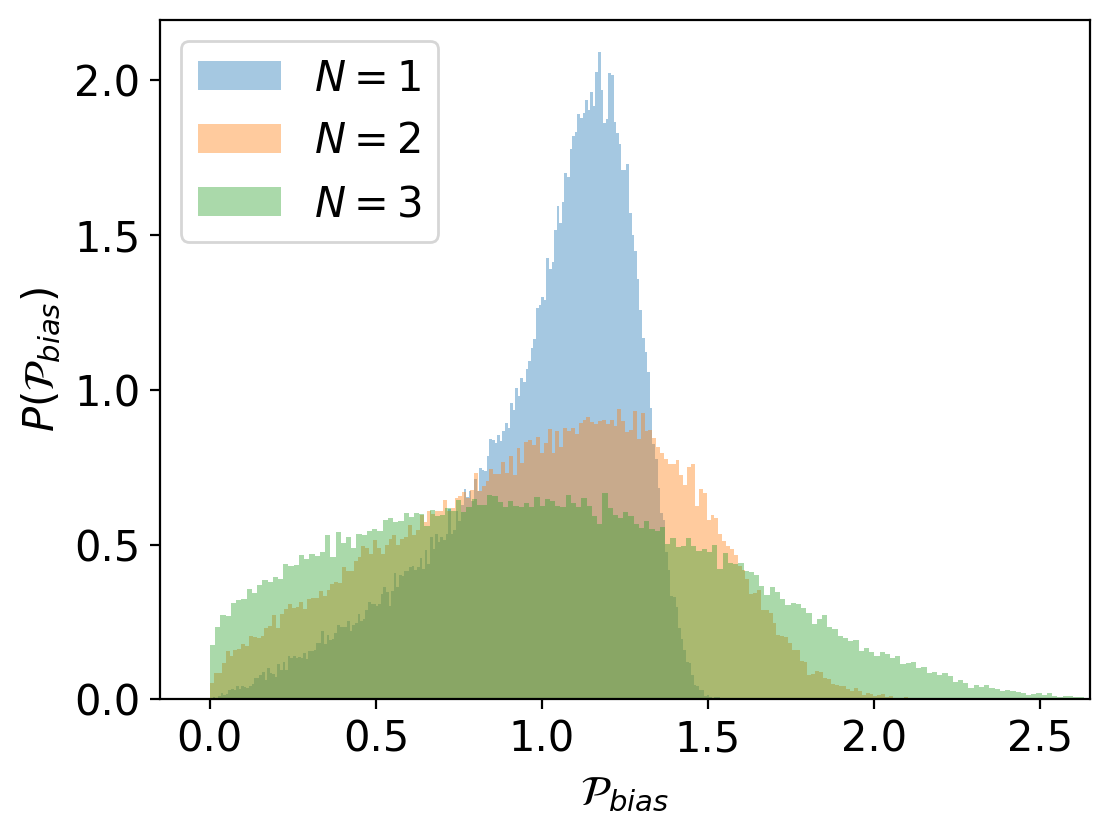

In [19]:
time_index = np.array([25, 50, 75, 100])-1
index_plot = 1

fig = plt.figure()
plt.hist(data1_Pbias[:,time_index[index_plot]], density=True, label='$N=1$', bins=200, alpha=0.4)
plt.hist(data2_Pbias[:,time_index[index_plot]], density=True, label='$N=2$', bins=200, alpha=0.4)
plt.hist(data3_Pbias[:,time_index[index_plot]], density=True, label='$N=3$', bins=200, alpha=0.4)
plt.xlabel('$\mathcal{P}_{bias}$')
plt.ylabel('$P(\mathcal{P}_{bias})$')
plt.xlim([-0.15,2.65])
# plt.ylim([0,4])
plt.legend(loc='upper left')
plt.show()


fig.savefig(FolderName_Fig + 'Pb_N.png', bbox_inches = "tight")

# Plot linear/nonlinear UQ

In [20]:
FileName_Est = 'DataEst_N1_R100000_k0_1_4k0_0_eta5_kT0.0001_v0_0.01_dt0.001_NG100_xr0.mat'
FileName_Lang = 'DataLang_N1_R100000_k0_1_4k0_0_eta5_kT0.0001_v0_0.01_dt0.001.mat'

In [21]:
# Load data
data_Est = scipy.io.loadmat(FolderName_Data + FileName_Est)
data_Lang = scipy.io.loadmat(FolderName_Data + FileName_Lang)

In [22]:
data_var_Pb_prop = data_Est['var_Pfactor_prop'][0]
data_var_Pb_2nd = data_Est['var_Pfactor_2nd'][0]
data_var_Pb = data_Lang['var_Pfactor'][0]
data_time_est = data_Est['time_est'][0]
data_time_pre = data_Est['time_pre'][0]
data_time = data_Lang['time'][0]

print(data_var_Pb_prop.shape)
print(data_var_Pb_2nd.shape)
print(data_var_Pb.shape)
print(data_time_est.shape)
print(data_time_pre.shape)
print(data_time.shape)

(5000,)
(106,)
(10000,)
(106,)
(5000,)
(10000,)


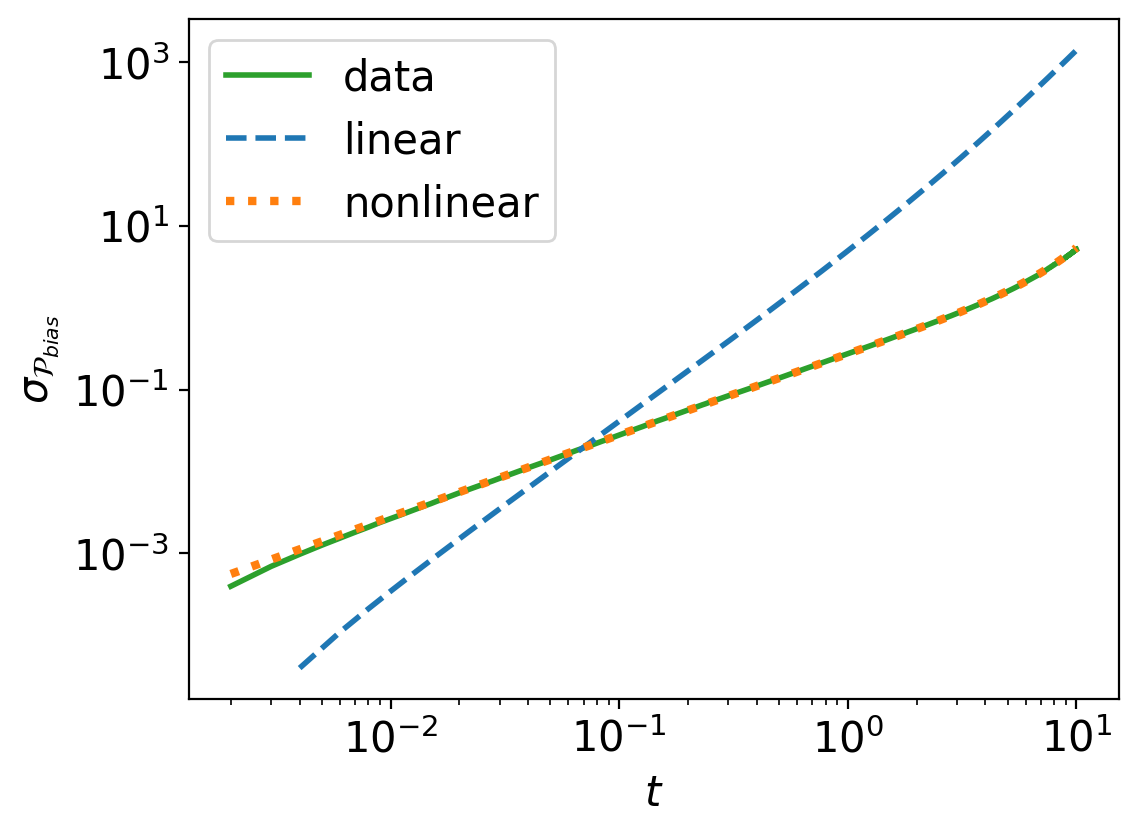

In [23]:
std_Pb = np.sqrt(data_var_Pb)
std_Pb_prop = np.sqrt(data_var_Pb_prop)
std_Pb_2nd = np.sqrt(data_var_Pb_2nd)

fig = plt.figure()
plt.plot(data_time[1:], std_Pb[1:], 'C2', linewidth=2.0, label = 'data')
plt.plot(data_time_pre[1:], std_Pb_prop[1:], 'C0--', linewidth=2.0, label = 'linear')
plt.plot(data_time_est, std_Pb_2nd, 'C1:', linewidth=3.0, label = 'nonlinear')
plt.xlabel('$t$')
plt.ylabel('$\sigma_{\mathcal{P}_{bias}}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

fig.savefig(FolderName_Fig + 'Linear_Nonlinear_UQ.png', bbox_inches = "tight")


# Plot 1D mass-spring chain results

In [24]:
# Function for plotting figures for each case
def PlotFig_1DLangevin(FileName_Lang, FileName_Est, FigName):
  
  # Load data
  data_Est = scipy.io.loadmat(FolderName_Data + FileName_Est)
  data_Lang = scipy.io.loadmat(FolderName_Data + FileName_Lang)

  data_N = data_Lang['N'][0,0]
  data_Nt = data_Lang['Nt'][0,0]
  data_time = data_Lang['time'][0]
  data_r_1 = data_Lang['r_1']
  data_r_2 = data_Lang['r_2']
  data_r_bias = data_Lang['r_bias']
  data_Fex_1 = data_Lang['Force_1'][0]
  data_Fex_2 = data_Lang['Force_2'][0]
  data_Fex_bias = data_Lang['Force_bias'][0]
  data_W_1 = data_Lang['Wave_1'][0]
  data_W_2 = data_Lang['Wave_2'][0]
  data_W_bias = data_Lang['Wave_bias'][0]

  data_var_Pb = data_Lang['var_Pfactor'][0]
  data_var_Pb_2nd = data_Est['var_Pfactor_2nd'][0]
  data_err_N = data_Est['err_Nfactor'][0]
  data_err_N_2nd = data_Est['err_Nfactor_2nd'][0]
  data_time_est = data_Est['time_est'][0]

  # print(data_N)
  # print(data_Nt)
  # print(data_time.shape)
  # print(data_r_1.shape)
  # print(data_r_2.shape)
  # print(data_r_bias.shape)
  # print(data_Fex_1.shape)
  # print(data_Fex_2.shape)
  # print(data_Fex_bias.shape)
  # print(data_W_1.shape)
  # print(data_W_2.shape)
  # print(data_W_bias.shape)
  # print(data_var_Pb.shape)
  # print(data_var_Pb_2nd.shape)
  # print(data_err_N.shape)
  # print(data_err_N_2nd.shape)
  # print(data_time_est.shape)

  fig = plt.figure(figsize=(15,8), tight_layout=1.15)
  spec = mpl.gridspec.GridSpec(ncols=6, nrows=2) # 6 columns evenly divides both 2 & 3

  ax1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
  ax2 = fig.add_subplot(spec[0,2:4])
  ax3 = fig.add_subplot(spec[0,4:])
  ax4 = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
  ax5 = fig.add_subplot(spec[1,3:5])
  
  ax=ax1
  plt.sca(ax)
  
  for i in range(data_N):
    plt.plot(data_time, data_r_2[i], 'C0', linewidth=2.0)
    plt.plot(data_time, data_r_1[i], 'C2--', linewidth=2.0)
    plt.plot(data_time, data_r_bias[i], 'C1:', linewidth=2.5)
  plt.xlabel('$t$')
  plt.ylabel(r'$\langle x \rangle$')
  ax.text(-0.22,1.05,'(a)',transform=ax.transAxes)
  plt.legend(['$V$', '$\~V$', '$\~V$ with bias'])


  # ax=axs[0,1]
  ax=ax2
  plt.sca(ax)

  plt.plot(data_time, data_Fex_2, 'C0', linewidth=2.5, label = '$V$')
  plt.plot(data_time, data_Fex_1, 'C2--', linewidth=2.5, label = '$\~V$')
  plt.plot(data_time, data_Fex_bias, 'C1:', linewidth=3.0, label = '$\~V$ with bias')
  plt.xlabel('$t$')
  plt.ylabel(r'$\langle F_{ex} \rangle$')
  ax.text(-0.23,1.05,'(b)',transform=ax.transAxes)
  plt.legend()


  # ax=axs[1,0]
  ax=ax3
  plt.sca(ax)

  plt.plot(data_time, data_W_2, 'C0', linewidth=2.5, label = '$V$')
  plt.plot(data_time, data_W_1, 'C2--', linewidth=2.5, label = '$\~V$')
  plt.plot(data_time, data_W_bias, 'C1:', linewidth=3.0, label = '$\~V$ with bias')
  plt.xlabel(r'$t$')
  plt.ylabel(r'$\langle W \rangle$')
  ax.text(-0.24,1.05,'(c)',transform=ax.transAxes)
  plt.legend()


  # ax=axs[1,1]
  ax=ax4
  plt.sca(ax)

  std_Pb = np.sqrt(data_var_Pb)
  std_Pb_2nd = np.sqrt(data_var_Pb_2nd)
  
  plt.plot(data_time[1:], std_Pb[1:], linewidth=2.0, label = 'data')
  plt.plot(data_time_est, std_Pb_2nd, '--', linewidth=2.0, label = 'prediction')
  plt.xlabel('$t$')
  plt.ylabel('$\sigma_{\mathcal{P}_{bias}}$')
  plt.xscale('log')
  plt.yscale('log')
  ax.text(-0.22,1.05,'(d)',transform=ax.transAxes)
  plt.legend(loc='upper left')


  ax=ax5
  plt.sca(ax)

  plt.plot(data_time[1:], data_err_N[1:], linewidth=2.0, label = 'data')
  plt.plot(data_time_est, data_err_N_2nd, '--', linewidth=2.0, label = 'prediction')
  plt.xlabel('$t$')
  plt.ylabel('$|\mathcal{N}-1|$')
  plt.yscale('log')
  ax.text(-0.25,1.05,'(e)',transform=ax.transAxes)
  plt.legend(loc='lower right')

  plt.show()

  fig.savefig(FolderName_Fig + FigName + '.png', bbox_inches = "tight")


In [25]:
# Case 1: from quadratic to quartic
FileName_Lang = 'DataLang_N10_R100000_k0.5_1_4k0_100_eta5_kT0.0001_v0.01_0.01_dt0.001.mat'
FileName_Est = 'DataEst_N10_R100000_k0.5_1_4k0_100_eta5_kT0.0001_v0.01_0.01_dt0.001_NG100_xr0.mat'
FigName = '1D_V_to_V'

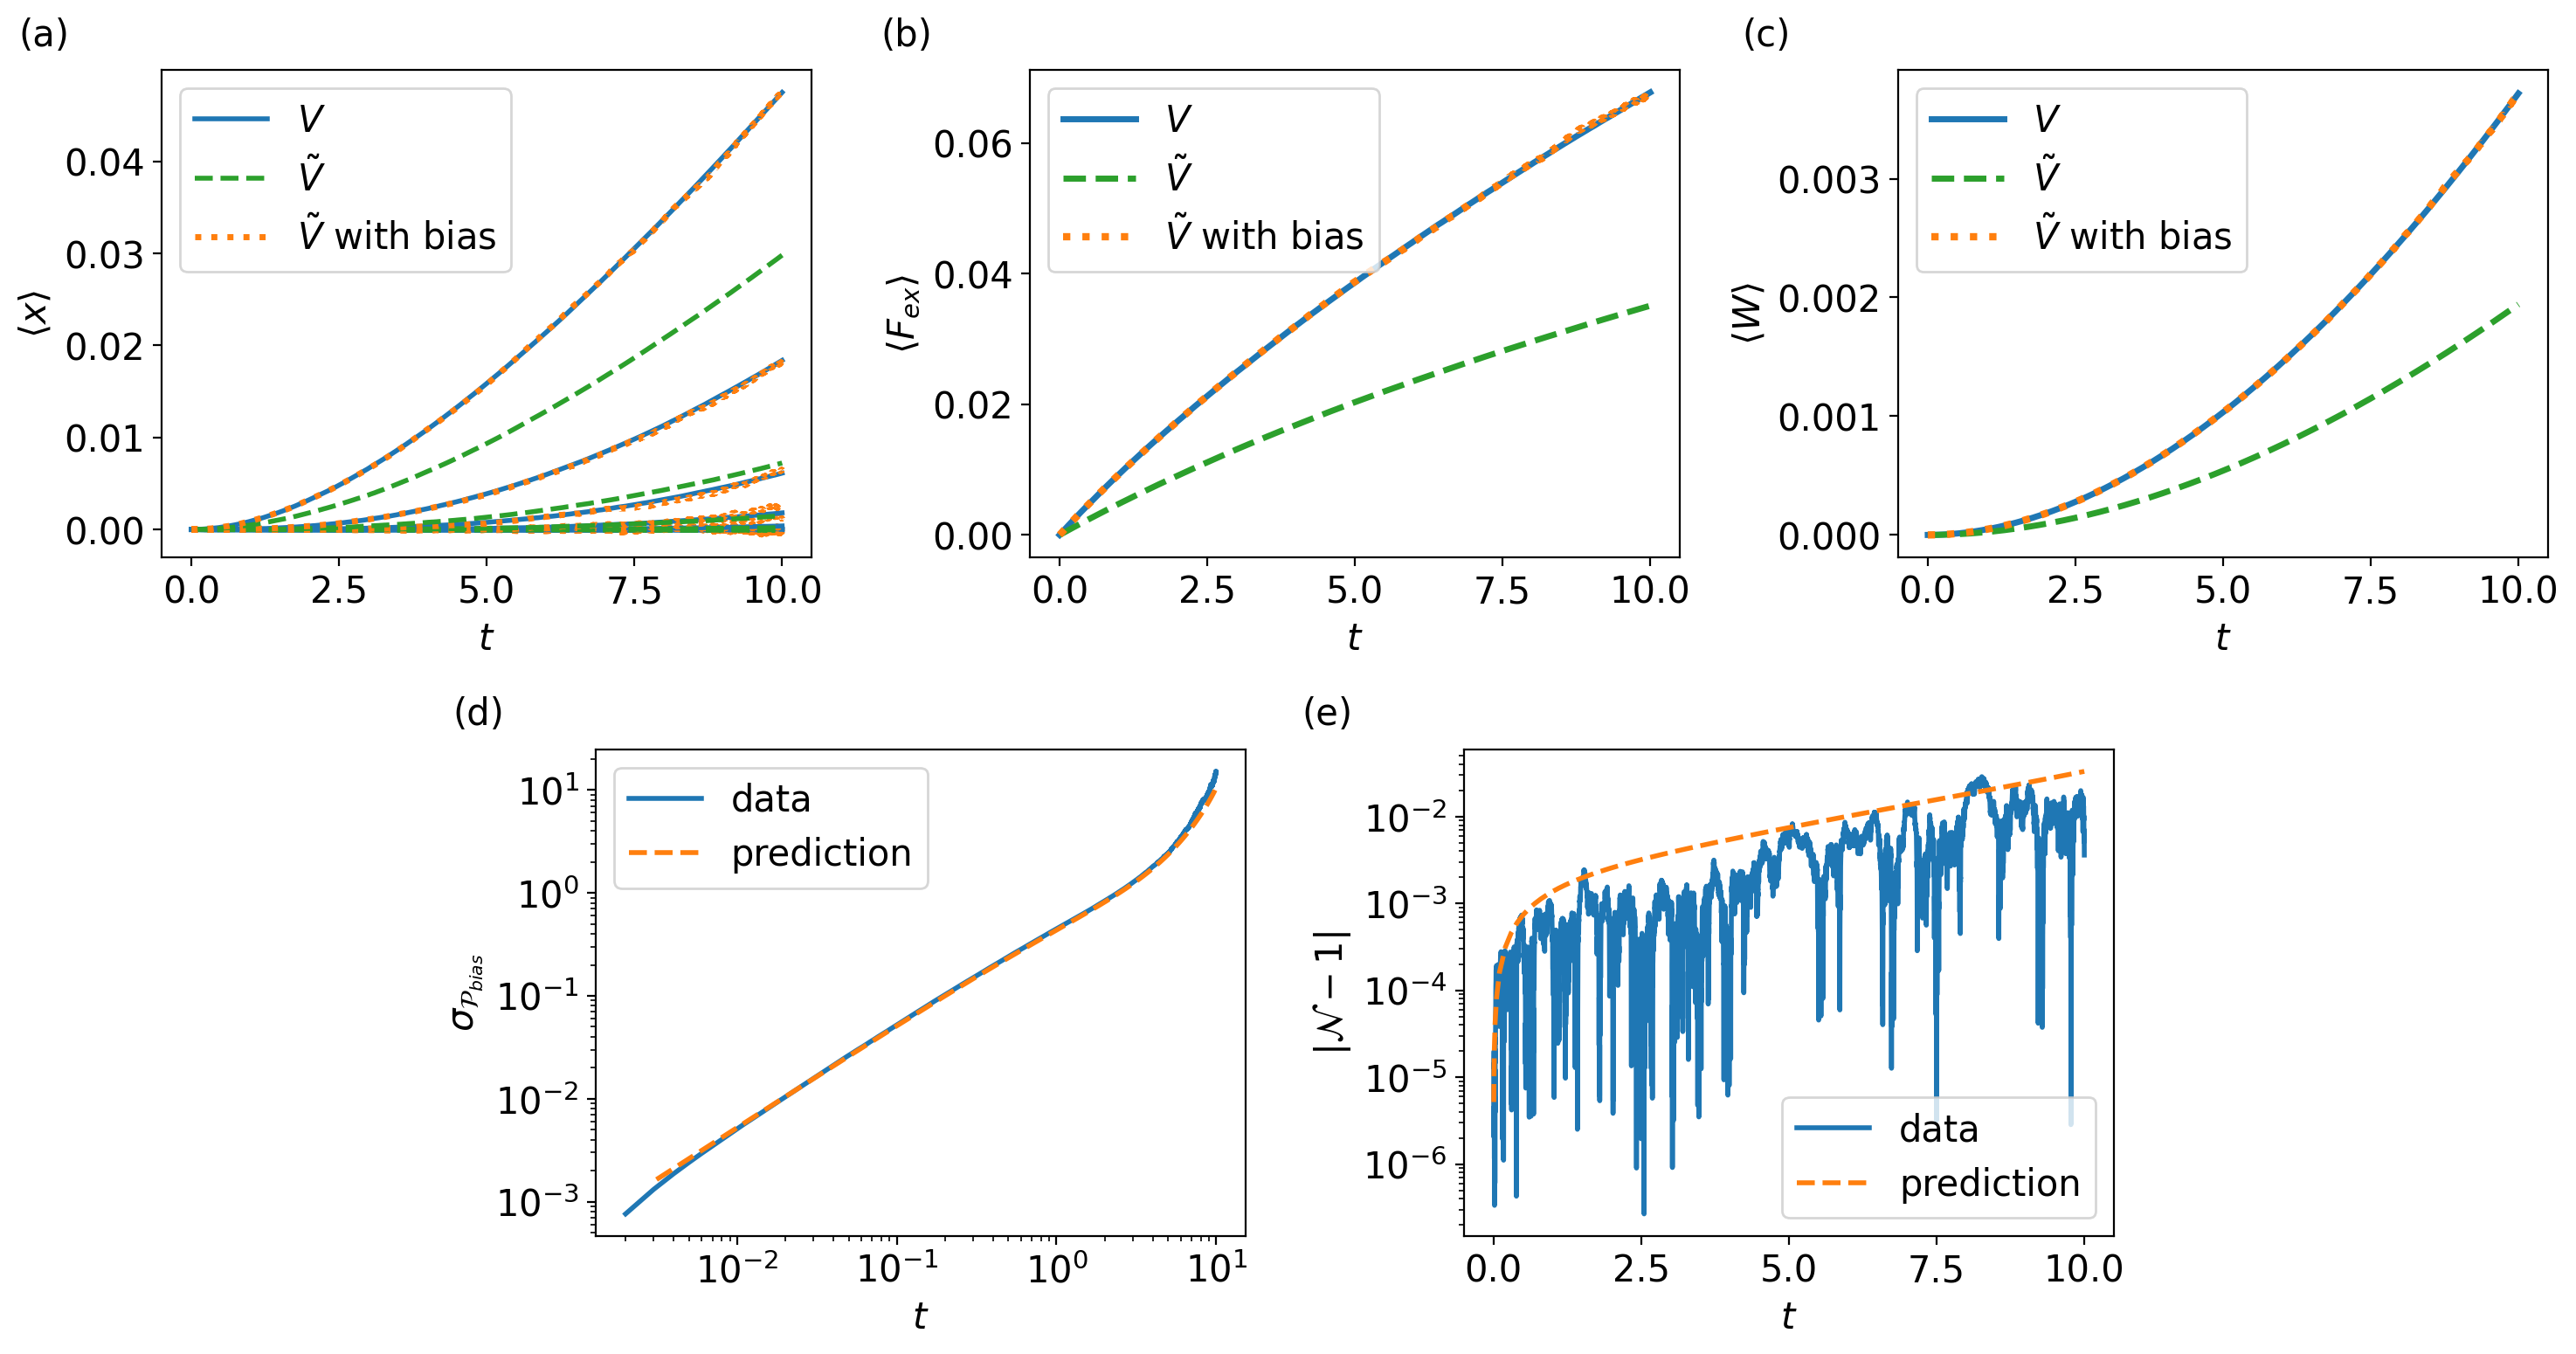

In [26]:
PlotFig_1DLangevin(FileName_Lang, FileName_Est, FigName)

In [27]:
# Case 2: from equilibrium to non-equilibrium
FileName_Lang = 'DataLang_N10_R100000_k1_1_4k100_100_eta5_kT0.0001_v0_0.01_dt0.001.mat'
FileName_Est = 'DataEst_N10_R100000_k1_1_4k100_100_eta5_kT0.0001_v0_0.01_dt0.001_NG100_xr0.mat'
FigName = '1D_eq_to_noneq'

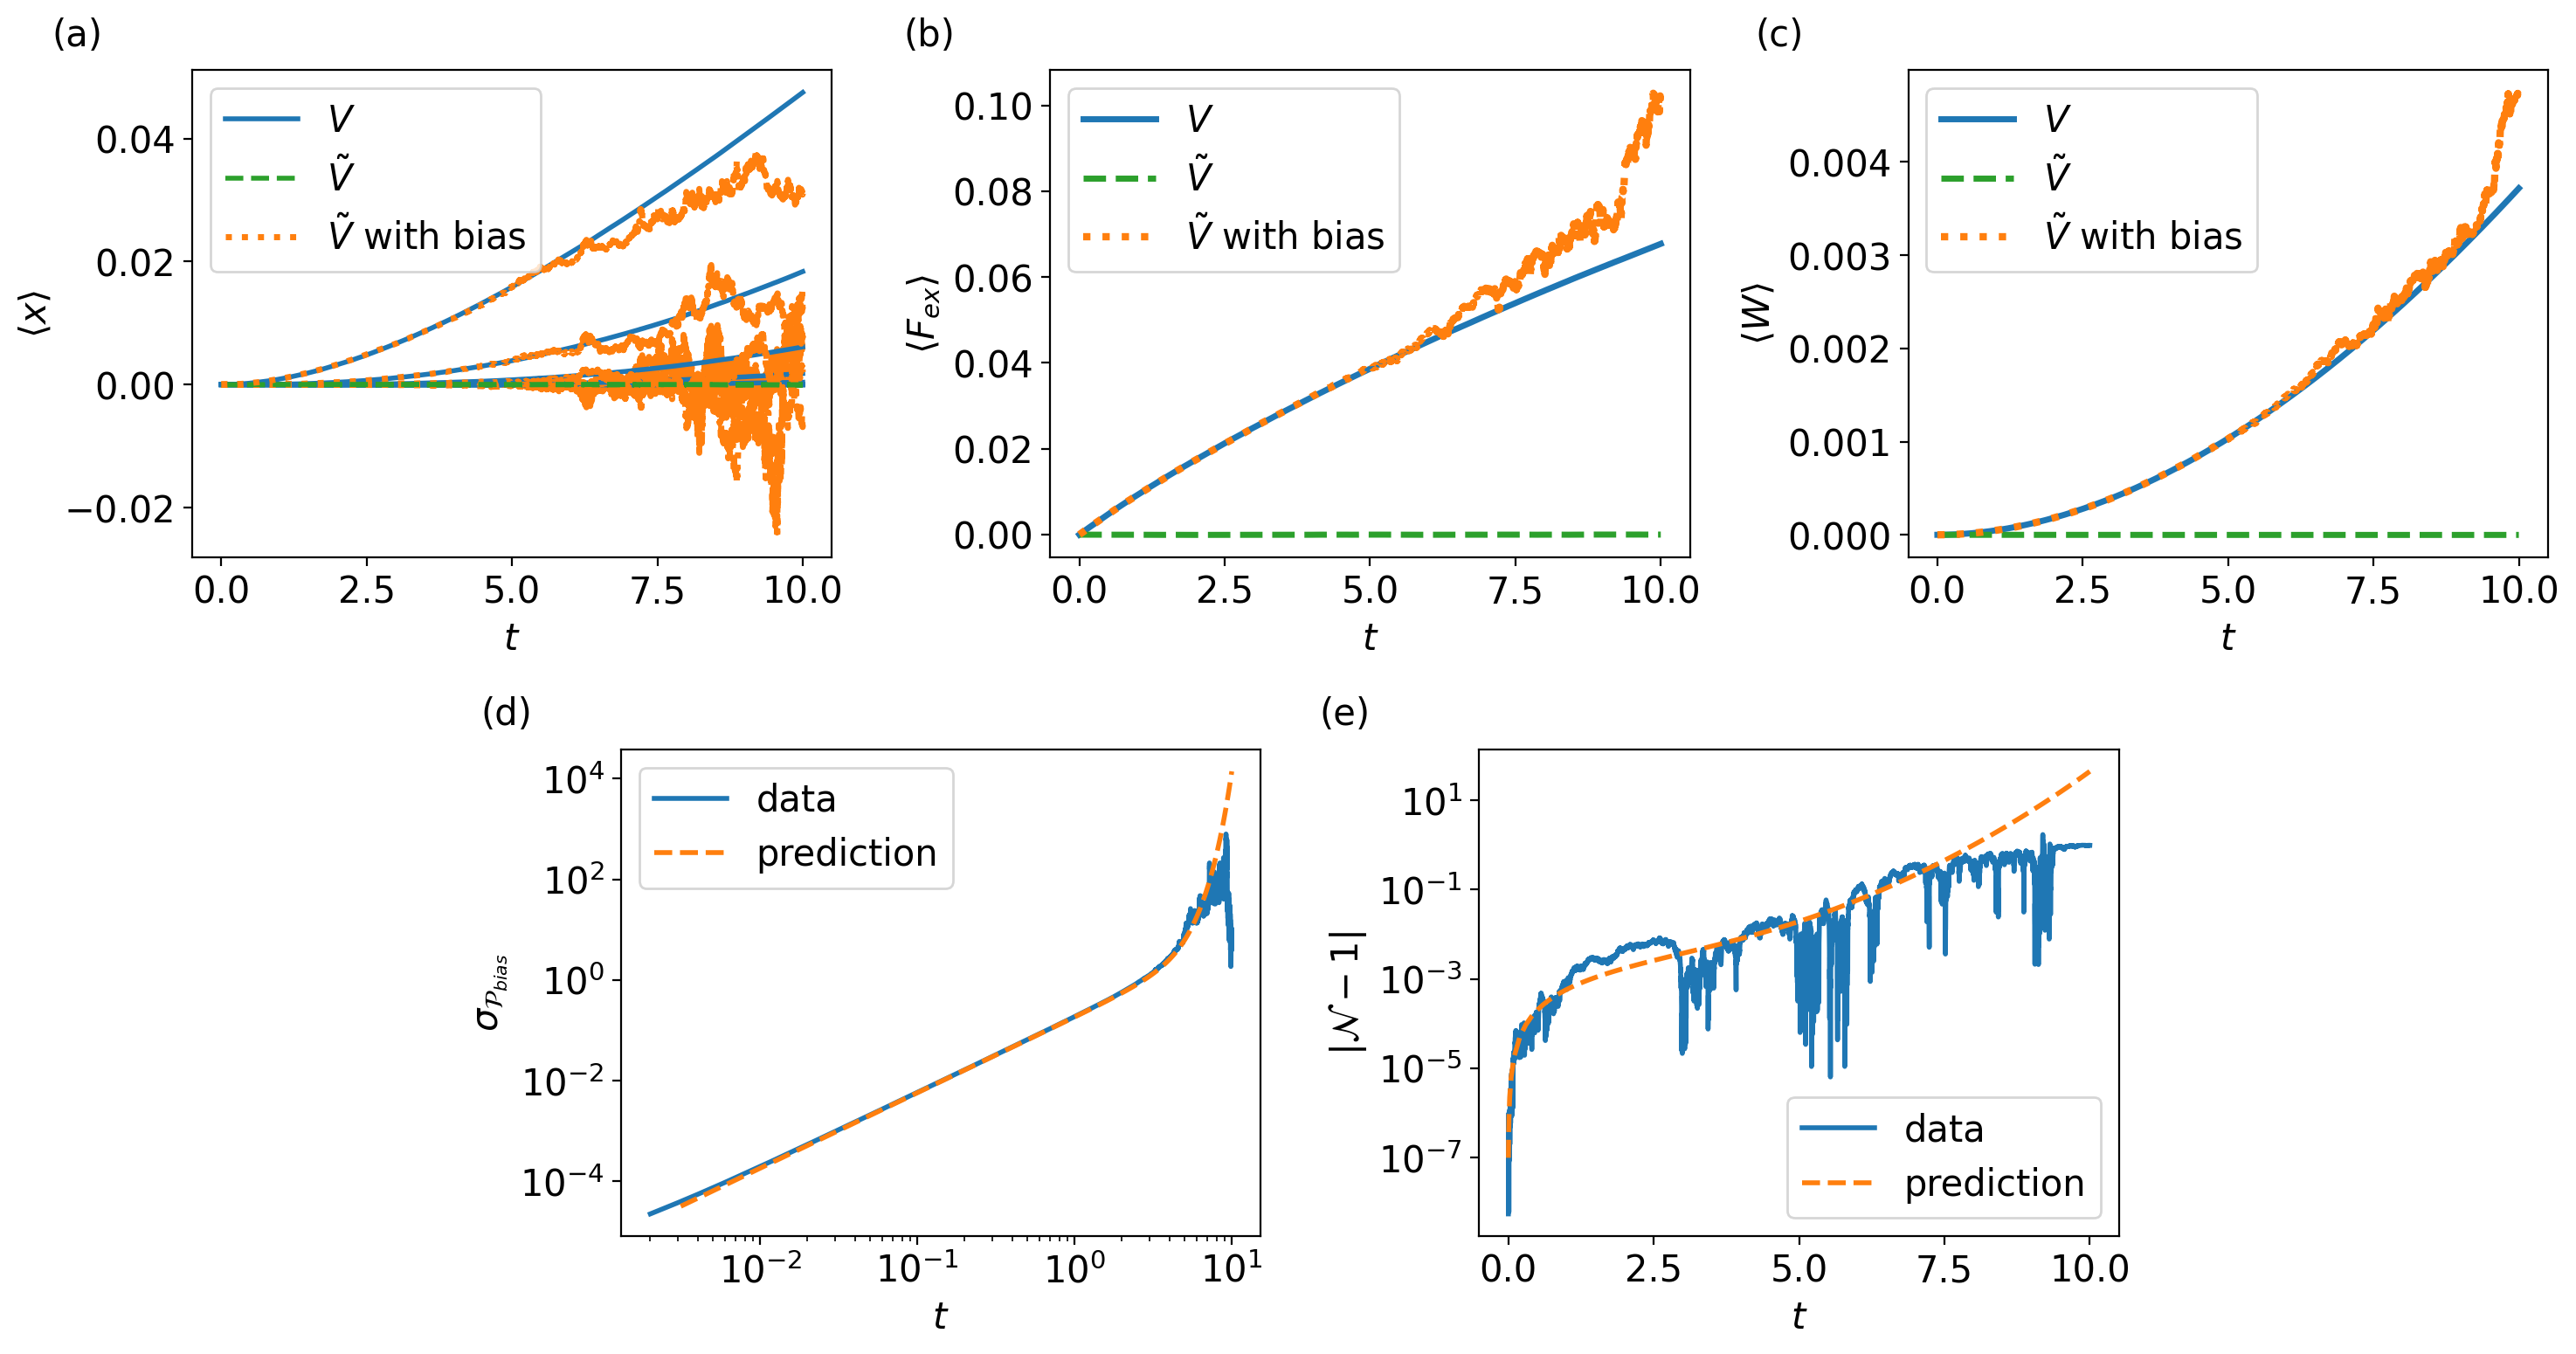

In [28]:
PlotFig_1DLangevin(FileName_Lang, FileName_Est, FigName)

In [29]:
# Case 3: from Brownian to non-equilibrium
FileName_Lang = 'DataLang_N10_R100000_k0_1_4k0_100_eta5_kT0.0001_v0_0.01_dt0.001.mat'
FileName_Est = 'DataEst_N10_R100000_k0_1_4k0_100_eta5_kT0.0001_v0_0.01_dt0.001_NG100_xr0.mat'
FigName = '1D_Brownian_to_noneq'

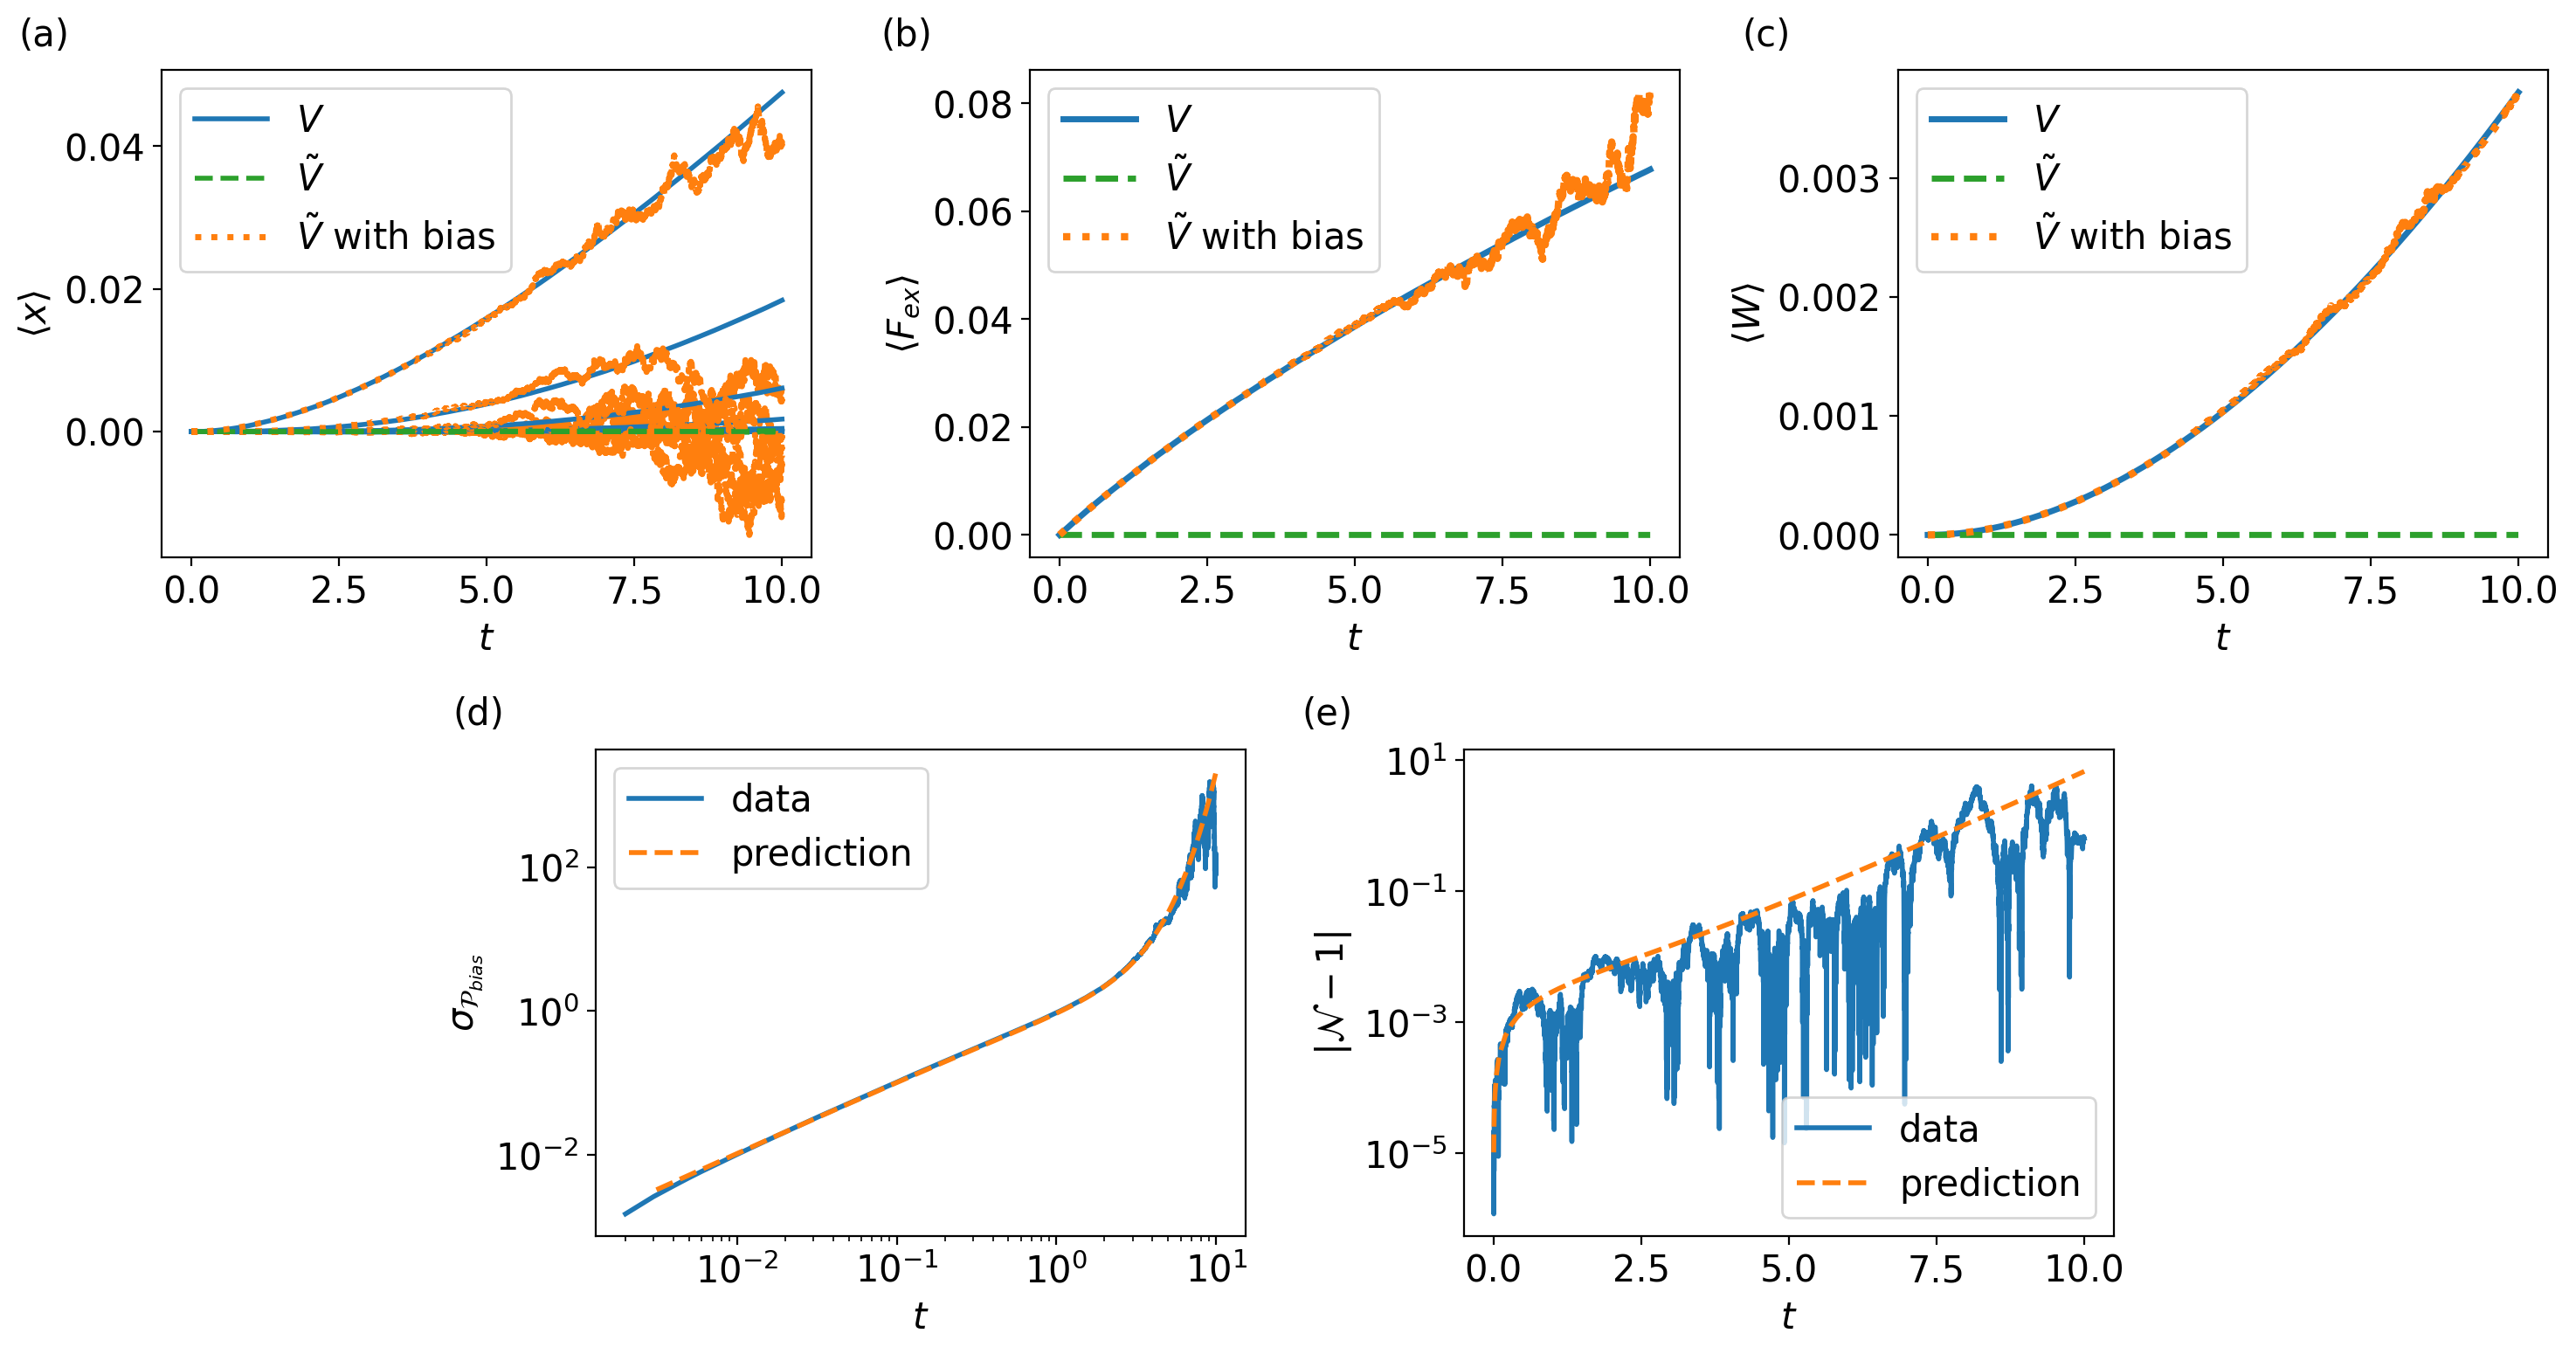

In [30]:
PlotFig_1DLangevin(FileName_Lang, FileName_Est, FigName)

# Plot 2D UQ

In [5]:
# When the predicted standard deviation from UQ is not real number 
# (variance is negative and not relialbe), set the std from this 
# estimation time points to the end as infinity for not showing 
# them in the plot.
def KeepPos(x):
  for i in range(len(x)):
    if np.isreal(x[i]) and np.real(x[i])>0:
      1
    else:
      x[i:] = float("NaN")
      break
  
  return x

In [6]:
FileNameH1_Lang = 'hertz.mat'
FileNameH11_Est = 'DataEst_N10_2DH_R1e+07_Vm10_12.5893_eta5_kT0.1_T100_NG100_xr0.mat'
FileNameH12_Est = 'DataEst_N10_2DH_R1e+07_Vm10_100_eta5_kT0.1_T100_NG100_xr0.mat'
FileNameH2_Lang = 'hertz_lowt.mat'
FileNameH21_Est = 'DataEst_N10_2DH_R1e+07_Vm1_1.25893_eta5_kT0.01_T10_NG100_xr0.mat'
FileNameH22_Est = 'DataEst_N10_2DH_R1e+07_Vm1_10_eta5_kT0.01_T10_NG100_xr0.mat'

FileNameLJ1_Lang = 'lj.mat'
FileNameLJ11_Est = 'DataEst_N10_2DLJ_R1e+07_Vm0.1_0.125893_eta5_kT0.1_T10_NG100_xr0.mat'
FileNameLJ12_Est = 'DataEst_N10_2DLJ_R1e+07_Vm0.1_1_eta5_kT0.1_T10_NG100_xr0.mat'
FileNameLJ2_Lang = 'lj_lowt.mat'
FileNameLJ21_Est = 'DataEst_N10_2DLJ_R1e+07_Vm0.01_0.0125893_eta5_kT0.01_T10_NG100_xr0.mat'
FileNameLJ22_Est = 'DataEst_N10_2DLJ_R1e+07_Vm0.01_0.1_eta5_kT0.01_T10_NG100_xr0.mat'

FigName = 'Hertzian_LJ_UQ'


# Load data
dataH1_Lang = scipy.io.loadmat(FolderName_Data + FileNameH1_Lang)
dataH11_Est = scipy.io.loadmat(FolderName_Data + FileNameH11_Est)
dataH12_Est = scipy.io.loadmat(FolderName_Data + FileNameH12_Est)

dataH2_Lang = scipy.io.loadmat(FolderName_Data + FileNameH2_Lang)
dataH21_Est = scipy.io.loadmat(FolderName_Data + FileNameH21_Est)
dataH22_Est = scipy.io.loadmat(FolderName_Data + FileNameH22_Est)

dataLJ1_Lang = scipy.io.loadmat(FolderName_Data + FileNameLJ1_Lang)
dataLJ11_Est = scipy.io.loadmat(FolderName_Data + FileNameLJ11_Est)
dataLJ12_Est = scipy.io.loadmat(FolderName_Data + FileNameLJ12_Est)

dataLJ2_Lang = scipy.io.loadmat(FolderName_Data + FileNameLJ2_Lang)
dataLJ21_Est = scipy.io.loadmat(FolderName_Data + FileNameLJ21_Est)
dataLJ22_Est = scipy.io.loadmat(FolderName_Data + FileNameLJ22_Est)


# Convert data
dataH1_dVs = dataH1_Lang['dVs'][0]
dataH1_time = dataH1_Lang['time'][0]
dataH1_var_Pb = dataH1_Lang['Ib_var']

dataH11_var_Pb_2nd = dataH11_Est['var_Pfactor_2nd'][0]
dataH11_time_est = dataH11_Est['time_est'][0]
dataH12_var_Pb_2nd = dataH12_Est['var_Pfactor_2nd'][0]
dataH12_time_est = dataH12_Est['time_est'][0]

dataH2_dVs = dataH2_Lang['dVs'][0]
dataH2_time = dataH2_Lang['time'][0]
dataH2_var_Pb = dataH2_Lang['Ib_var']

dataH21_var_Pb_2nd = dataH21_Est['var_Pfactor_2nd'][0]
dataH21_time_est = dataH21_Est['time_est'][0]
dataH22_var_Pb_2nd = dataH22_Est['var_Pfactor_2nd'][0]
dataH22_time_est = dataH22_Est['time_est'][0]

dataLJ1_dVs = dataLJ1_Lang['dVs'][0]
dataLJ1_time = dataLJ1_Lang['time'][0]
dataLJ1_var_Pb = dataLJ1_Lang['Ib_var']

dataLJ11_var_Pb_2nd = dataLJ11_Est['var_Pfactor_2nd'][0]
dataLJ11_time_est = dataLJ11_Est['time_est'][0]
dataLJ12_var_Pb_2nd = dataLJ12_Est['var_Pfactor_2nd'][0]
dataLJ12_time_est = dataLJ12_Est['time_est'][0]

dataLJ2_dVs = dataLJ2_Lang['dVs'][0]
dataLJ2_time = dataLJ2_Lang['time'][0]
dataLJ2_var_Pb = dataLJ2_Lang['Ib_var']

dataLJ21_var_Pb_2nd = dataLJ21_Est['var_Pfactor_2nd'][0]
dataLJ21_time_est = dataLJ21_Est['time_est'][0]
dataLJ22_var_Pb_2nd = dataLJ22_Est['var_Pfactor_2nd'][0]
dataLJ22_time_est = dataLJ22_Est['time_est'][0]

# print(dataH1_dVs.shape)
# print(dataH1_time.shape)
# print(dataH1_var_Pb.shape)
# print(dataH11_var_Pb_2nd.shape)
# print(dataH11_time_est.shape)
# print(dataH12_var_Pb_2nd.shape)
# print(dataH12_time_est.shape)

# print(dataH2_dVs.shape)
# print(dataH2_time.shape)
# print(dataH2_var_Pb.shape)
# print(dataH21_var_Pb_2nd.shape)
# print(dataH21_time_est.shape)
# print(dataH22_var_Pb_2nd.shape)
# print(dataH22_time_est.shape)

# print(dataLJ1_dVs.shape)
# print(dataLJ1_time.shape)
# print(dataLJ1_var_Pb.shape)
# print(dataLJ11_var_Pb_2nd.shape)
# print(dataLJ11_time_est.shape)
# print(dataLJ12_var_Pb_2nd.shape)
# print(dataLJ12_time_est.shape)

# print(dataLJ2_dVs.shape)
# print(dataLJ2_time.shape)
# print(dataLJ2_var_Pb.shape)
# print(dataLJ21_var_Pb_2nd.shape)
# print(dataLJ21_time_est.shape)
# print(dataLJ22_var_Pb_2nd.shape)
# print(dataLJ22_time_est.shape)


stdH11_Pb = KeepPos(np.sqrt(dataH1_var_Pb[1,:]))
stdH12_Pb = KeepPos(np.sqrt(dataH1_var_Pb[-1,:]))
stdH11_Pb_2nd = KeepPos(np.sqrt(dataH11_var_Pb_2nd))
stdH12_Pb_2nd = KeepPos(np.sqrt(dataH12_var_Pb_2nd))
chiH1 = 1-dataH1_dVs[1]
chiH2 = 1-dataH1_dVs[-1]

stdH21_Pb = KeepPos(np.sqrt(dataH2_var_Pb[1,:]))
stdH22_Pb = KeepPos(np.sqrt(dataH2_var_Pb[-1,:]))
stdH21_Pb_2nd = KeepPos(np.sqrt(dataH21_var_Pb_2nd))
stdH22_Pb_2nd = KeepPos(np.sqrt(dataH22_var_Pb_2nd))

stdLJ11_Pb = KeepPos(np.sqrt(dataLJ1_var_Pb[1,:]))
stdLJ12_Pb = KeepPos(np.sqrt(dataLJ1_var_Pb[-1,:]))
stdLJ11_Pb_2nd = KeepPos(np.sqrt(dataLJ11_var_Pb_2nd))
stdLJ12_Pb_2nd = KeepPos(np.sqrt(dataLJ12_var_Pb_2nd))
chiLJ1 = 1-dataLJ1_dVs[1]
chiLJ2 = 1-dataLJ1_dVs[-1]

stdLJ21_Pb = KeepPos(np.sqrt(dataLJ2_var_Pb[1,:]))
stdLJ22_Pb = KeepPos(np.sqrt(dataLJ2_var_Pb[-1,:]))
stdLJ21_Pb_2nd = KeepPos(np.sqrt(dataLJ21_var_Pb_2nd))
stdLJ22_Pb_2nd = KeepPos(np.sqrt(dataLJ22_var_Pb_2nd))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

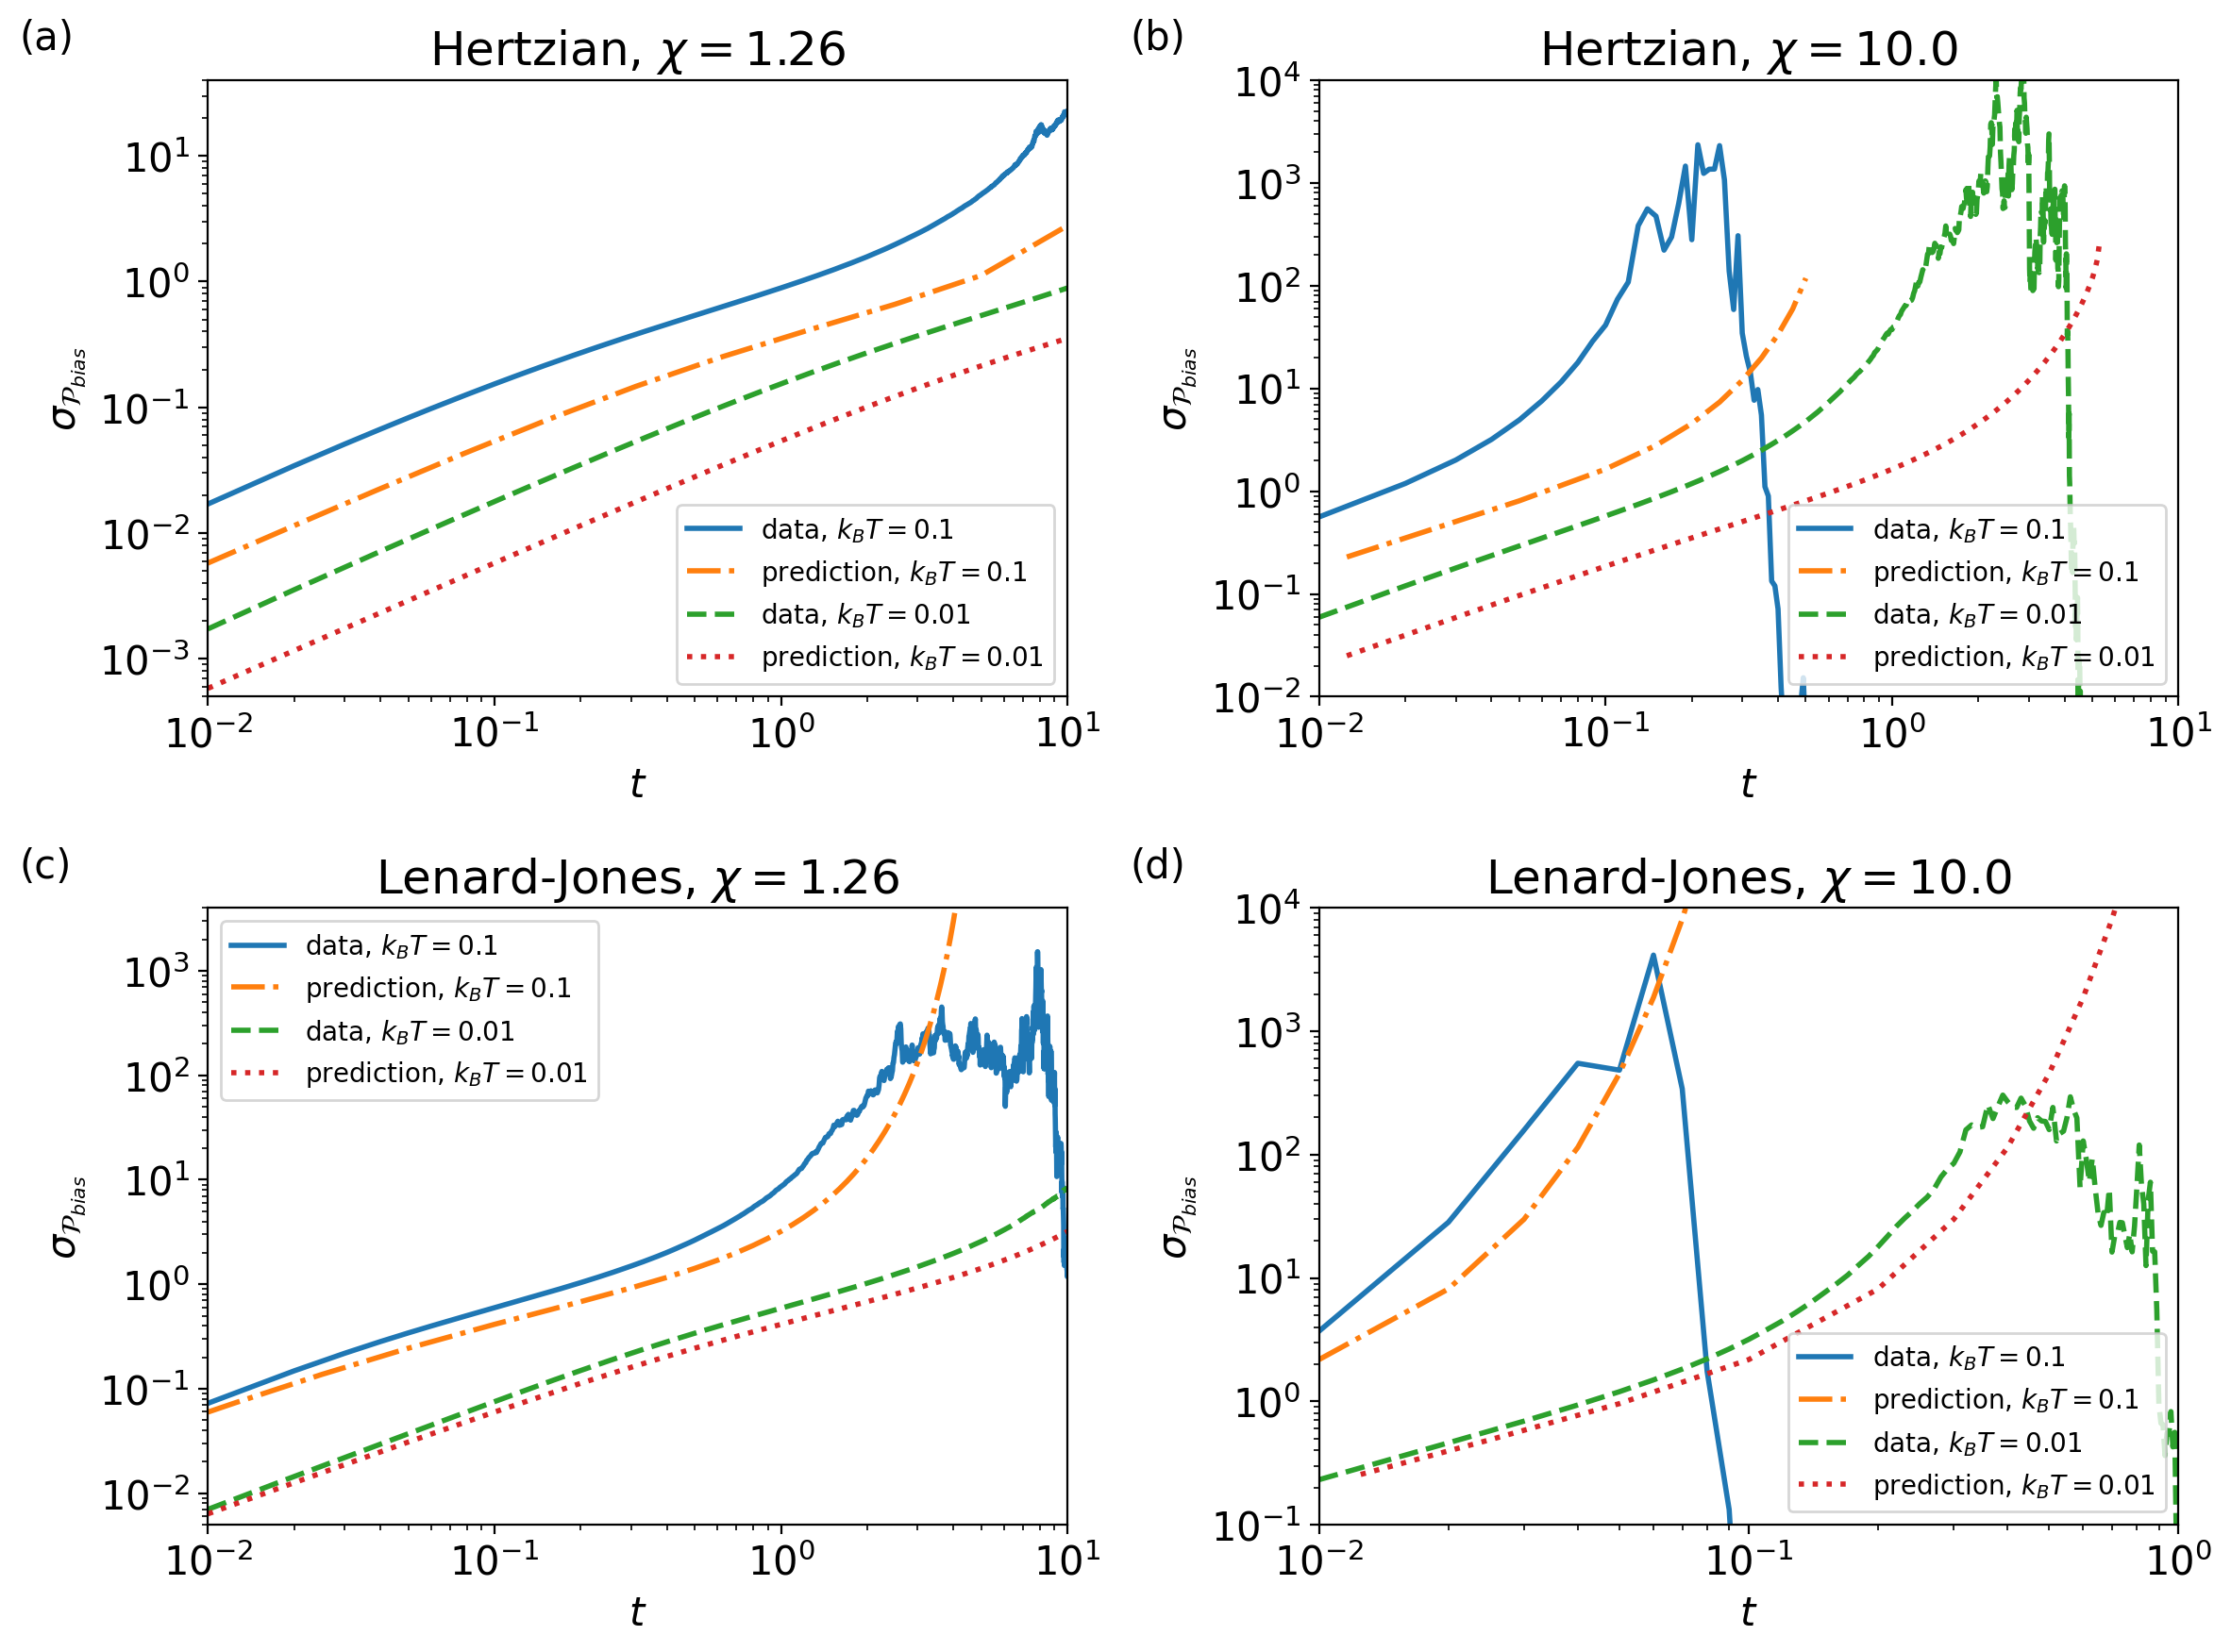

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12,9), tight_layout=1.1)
# fig, axs = plt.subplots(2, 2, figsize=(16,8), tight_layout=False)

ax=axs[0,0]
plt.sca(ax)

plt.plot(dataH1_time, stdH11_Pb, linewidth=2.0, label = 'data, $k_BT=0.1$')
plt.plot(dataH11_time_est, stdH11_Pb_2nd, '-.', linewidth=2.0, label = 'prediction, $k_BT=0.1$')
plt.plot(dataH2_time, stdH21_Pb, '--', linewidth=2.0, label = 'data, $k_BT=0.01$')
plt.plot(dataH21_time_est, stdH21_Pb_2nd, ':', linewidth=2.0, label = 'prediction, $k_BT=0.01$')
plt.xlabel('$t$')
plt.ylabel('$\sigma_{\mathcal{P}_{bias}}$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-2,10])
plt.ylim([5e-4,4e1])
plt.title('Hertzian, $\chi=$%.2f' % chiH1)
ax.text(-0.22,1.05,'(a)',transform=ax.transAxes)
plt.legend(loc='lower right', fontsize=10)


ax=axs[0,1]
plt.sca(ax)

plt.plot(dataH1_time, stdH12_Pb, linewidth=2.0, label = 'data, $k_BT=0.1$')
plt.plot(dataH12_time_est, stdH12_Pb_2nd, '-.', linewidth=2.0, label = 'prediction, $k_BT=0.1$')
plt.plot(dataH2_time, stdH22_Pb, '--', linewidth=2.0, label = 'data, $k_BT=0.01$')
plt.plot(dataH22_time_est, stdH22_Pb_2nd, ':', linewidth=2.0, label = 'prediction, $k_BT=0.01$')
plt.xlabel('$t$')
plt.ylabel('$\sigma_{\mathcal{P}_{bias}}$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-2,1e1])
plt.ylim([1e-2,1e4])
plt.title('Hertzian, $\chi=$%.1f' % chiH2)
ax.text(-0.22,1.05,'(b)',transform=ax.transAxes)
plt.legend(loc='lower right', fontsize=10)

ax=axs[1,0]
plt.sca(ax)

plt.plot(dataLJ1_time, stdLJ11_Pb, linewidth=2.0, label = 'data, $k_BT=0.1$')
plt.plot(dataLJ11_time_est, stdLJ11_Pb_2nd, '-.', linewidth=2.0, label = 'prediction, $k_BT=0.1$')
plt.plot(dataLJ2_time, stdLJ21_Pb, '--', linewidth=2.0, label = 'data, $k_BT=0.01$')
plt.plot(dataLJ21_time_est, stdLJ21_Pb_2nd, ':', linewidth=2.0, label = 'prediction, $k_BT=0.01$')
plt.xlabel('$t$')
plt.ylabel('$\sigma_{\mathcal{P}_{bias}}$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-2,10])
plt.ylim([5e-3,4e3])
plt.title('Lenard-Jones, $\chi=$%.2f' % chiLJ1)
ax.text(-0.22,1.05,'(c)',transform=ax.transAxes)
plt.legend(loc='upper left', fontsize=10)


ax=axs[1,1]
plt.sca(ax)

plt.plot(dataLJ1_time, stdLJ12_Pb, linewidth=2.0, label = 'data, $k_BT=0.1$')
plt.plot(dataLJ12_time_est, stdLJ12_Pb_2nd, '-.', linewidth=2.0, label = 'prediction, $k_BT=0.1$')
plt.plot(dataLJ2_time, stdLJ22_Pb, '--', linewidth=2.0, label = 'data, $k_BT=0.01$')
plt.plot(dataLJ22_time_est, stdLJ22_Pb_2nd, ':', linewidth=2.0, label = 'prediction, $k_BT=0.01$')
plt.xlabel('$t$')
plt.ylabel('$\sigma_{\mathcal{P}_{bias}}$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-2,1])
plt.ylim([1e-1,1e4])
plt.title('Lenard-Jones, $\chi=$%.1f' % chiLJ2)
ax.text(-0.22,1.05,'(d)',transform=ax.transAxes)
plt.legend(loc='lower right', fontsize=10)
plt.show()

fig.savefig(FolderName_Fig + FigName + '.png', bbox_inches = "tight")
